Kowariancja i współczynnik korelacji

In [88]:
import pandas as pd
import numpy as np
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 5, 10, 11, 12, 14]
     
x_, y_ = np.array(x), np.array(y)
print("x_:", x_)
print("y_:", y_)

x__, y__ = pd.Series(x_), pd.Series(y_)
print("x__:", x__)
print("y__:", y__)

#Kowariancja

n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
print("cov_xy", cov_xy)

x_: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
y_: [ 0  2  2  2  2  2  3  3  6  7  4  7  6  6  9  4  5  5  5 10 11 12 14]
x__: 0    -10
1     -9
2     -8
3     -7
4     -6
5     -5
6     -4
7     -3
8     -2
9     -1
10     0
11     1
12     2
13     3
14     4
15     5
16     6
17     7
18     8
19     9
20    10
dtype: int64
y__: 0      0
1      2
2      2
3      2
4      2
5      2
6      3
7      3
8      6
9      7
10     4
11     7
12     6
13     6
14     9
15     4
16     5
17     5
18     5
19    10
20    11
21    12
22    14
dtype: int64
cov_xy 14.399999999999997


In [89]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 5, 10, 11, 12, 14]

y = y[:len(x)]

x_, y_ = np.array(x), np.array(y)

cov_matrix = np.cov(x_, y_)
print(cov_matrix)

print(x_.var(ddof=1))
print(y_.var(ddof=1))

[[38.5        14.4       ]
 [14.4         8.36190476]]
38.5
8.361904761904764


In [90]:
cov_xy = cov_matrix[0, 1]
print(cov_xy)

cov_xy = cov_matrix[1, 0]
print(cov_xy)

cov_xy = x__.cov(y__)
print(cov_xy)

cov_xy = y__.cov(x__)
print(cov_xy)


14.4
14.4
14.4
14.4


Współczynnik korelacji

In [91]:
import scipy
var_x = sum((item - mean_x) ** 2 for item in x) / (n - 1)
var_y = sum((item - mean_y) ** 2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
print(r)

r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

corr_matrix = np.corrcoef(x_, y_)
print(corr_matrix)

r = corr_matrix[0, 1]
print(r)

r = corr_matrix[1, 0]
print(r)

0.7349426247202111
0.8025637115387777
1.19969957998742e-05
[[1.         0.80256371]
 [0.80256371 1.        ]]
0.8025637115387775
0.8025637115387776


Korelacja ujemna

In [92]:
scipy.stats.linregress(x_, y_)

result = scipy.stats.linregress(x_, y_)
r = result.rvalue
print(r)

r = x__.corr(y__)
print(r)

r = y__.corr(x__)
print(r)

0.8025637115387775
0.8025637115387775
0.8025637115387776


Praca z danymi 2D
Osie(axis)

In [93]:
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])
print(a)

print(np.mean(a))
print(a.mean())

print(np.median(a))
print(a.var(ddof=1))

print(np.mean(a, axis=0))
print(a.mean(axis=0))

print(np.mean(a, axis=1))
print(a.mean(axis=1))

print(np.median(a, axis=0))
print(np.median(a, axis=1))

print(a.var(axis=0, ddof=1))
print(a.var(axis=1, ddof=1))

[[ 1  1  1]
 [ 2  3  1]
 [ 4  9  2]
 [ 8 27  4]
 [16  1  1]]
5.4
5.4
2.0
53.40000000000001
[6.2 8.2 1.8]
[6.2 8.2 1.8]
[ 1.  2.  5. 13.  6.]
[ 1.  2.  5. 13.  6.]
[4. 3. 1.]
[1. 2. 4. 8. 1.]
[ 37.2 121.2   1.7]
[  0.   1.  13. 151.  75.]


Ramki danych(Data Frame)

In [94]:
print(scipy.stats.gmean(a))
print(scipy.stats.gmean(a, axis=0))
print(scipy.stats.gmean(a, axis=1))
print(scipy.stats.gmean(a, axis=None))

print(scipy.stats.describe(a, axis=None, ddof=1, bias=False))
print(scipy.stats.describe(a, ddof=1, bias=False))
print(scipy.stats.describe(a, axis=1, ddof=1, bias=False))

result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
print(result.mean)

row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
print(df)
print(df.mean())
print(df.var())
print(df.mean(axis=1))
print(df.var(axis=1))

[4.         3.73719282 1.51571657]
[4.         3.73719282 1.51571657]
[1.         1.81712059 4.16016765 9.52440631 2.5198421 ]
2.829705017016332
DescribeResult(nobs=15, minmax=(np.int64(1), np.int64(27)), mean=np.float64(5.4), variance=np.float64(53.40000000000001), skewness=np.float64(2.264965290423389), kurtosis=np.float64(5.212690982795767))
DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))
DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([       nan, 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([ nan, -1.5, -1.5, -1.5, -1.5]))
[ 1.  2.  5. 13.  6.]
         A   B  C
first    1   1  1
second   2   3  1
third    4   9  2
fourth   8  27

In [95]:
print(df['A'])
print(df['A'].mean())
print(df['A'].var())

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int64
6.2
37.20000000000001


In [96]:
print(df.values)
print(df.to_numpy())


[[ 1  1  1]
 [ 2  3  1]
 [ 4  9  2]
 [ 8 27  4]
 [16  1  1]]
[[ 1  1  1]
 [ 2  3  1]
 [ 4  9  2]
 [ 8 27  4]
 [16  1  1]]


In [97]:
print(df.describe())
print(df.describe().at['mean','A'])
print(df.describe().at['50%','A'])

              A          B        C
count   5.00000   5.000000  5.00000
mean    6.20000   8.200000  1.80000
std     6.09918  11.009087  1.30384
min     1.00000   1.000000  1.00000
25%     2.00000   1.000000  1.00000
50%     4.00000   3.000000  1.00000
75%     8.00000   9.000000  2.00000
max    16.00000  27.000000  4.00000
6.2
4.0


Macierz korelacji wielu zmiennych

In [98]:
data = {
    'x': [45, 37, 42, 35, 39],
    'y': [38, 31, 26, 28, 33],
    'z': [10, 15, 17, 21, 12]
}

dataframe = pd.DataFrame(data, columns=['x', 'y', 'z'])
print("Dataframe is : ")
print(dataframe)

matrix = dataframe.corr()
print("Correlation matrix is : ")
print(matrix)


Dataframe is : 
    x   y   z
0  45  38  10
1  37  31  15
2  42  26  17
3  35  28  21
4  39  33  12
Correlation matrix is : 
          x         y         z
x  1.000000  0.518457 -0.701886
y  0.518457  1.000000 -0.860941
z -0.701886 -0.860941  1.000000


In [99]:
from sklearn import datasets
import pandas as pd

dataset = datasets.load_iris()
dataframe = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
dataframe["target"] = dataset.target

matrix = dataframe.corr()
print(matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


Wizualizacja macierzy Korelacji

<Axes: >

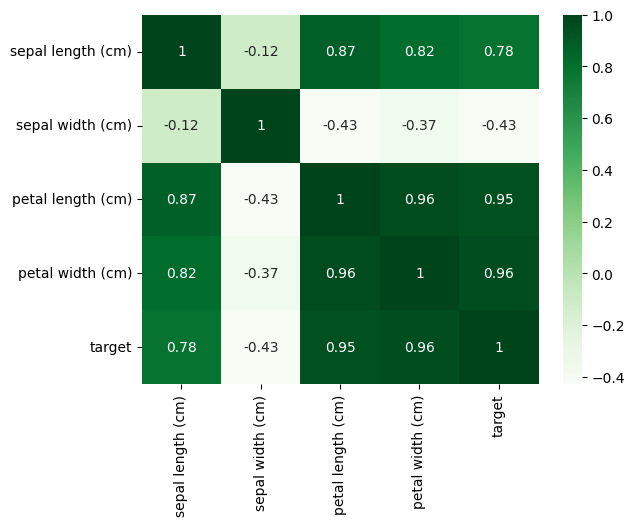

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

dataset = datasets.load_iris()
dataframe = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
dataframe["target"] = dataset.target
matrix = dataframe.corr()

sns.heatmap(matrix, cmap="Greens", annot=True)


Wieloraka regresja liniowa

In [101]:
import numpy as np
import statsmodels.api as sm

y = [1, 2, 3, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 6, 5, 4, 5, 4, 3, 4]

x = [
    [4, 2, 3, 4, 5, 4, 5, 6, 7, 4, 8, 9, 8, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5],
    [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, 6],
    [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 4, 4, 4, 4]
]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     4.526
Date:                Wed, 09 Oct 2024   Prob (F-statistic):             0.0141
Time:                        19:01:04   Log-Likelihood:                -29.615
No. Observations:                  24   AIC:                             67.23
Df Residuals:                      20   BIC:                             71.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2047      0.134      1.526      0.1

In [102]:
import pandas as pd

data = {
    "year": [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 
             2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
    "month": [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    "interest_rate": [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2.25, 2, 2, 2, 
                      1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
    "unemployment_rate": [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 
                          5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1, 6.1, 6.1],
    "index_price": [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 
                    1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]
}

df = pd.DataFrame(data)

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.25                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                5.9         1047
13  2016     11           2.00                5.8          965
14  2016     10           1.75                6.1      

Sprawdzanie liniowości

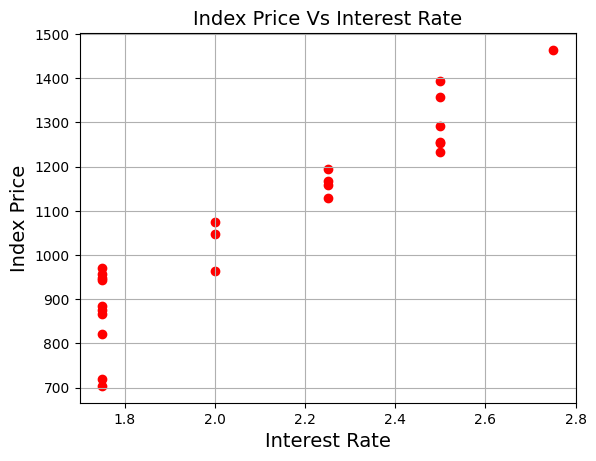

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "year": [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 
             2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
    "month": [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    "interest_rate": [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2.25, 2, 2, 2, 
                      1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
    "unemployment_rate": [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 
                          5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1, 6.1, 6.1],
    "index_price": [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 
                    1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]
}

df = pd.DataFrame(data)

plt.scatter(df["interest_rate"], df["index_price"], color="red")
plt.title("Index Price Vs Interest Rate", fontsize=14)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Index Price", fontsize=14)
plt.grid(True)
plt.show()


In [104]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

data = {
    "year": [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 
             2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
    "month": [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    "interest_rate": [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2.25, 2, 2, 2, 
                      1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
    "unemployment_rate": [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 
                          5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1, 6.1, 6.1],
    "index_price": [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 
                    1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]
}

df = pd.DataFrame(data)

x = df[["interest_rate", "unemployment_rate"]]
y = df["index_price"]

regression = linear_model.LinearRegression()
regression.fit(x, y)
predictions_sklearn = regression.predict(x)
print("Intercept: \n", regression.intercept_)
print("Coefficients: \n", regression.coef_)
print("Correlation R: \n", regression.score(x, y))

Intercept: 
 666.0007092827353
Coefficients: 
 [ 480.66938558 -104.2224488 ]
Correlation R: 
 0.8919550211885114


Czy te dwie badane zależności są liniowe, czy nie?
Nie

Skrearn

In [105]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

data = {
    "year": [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 
             2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
    "month": [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    "interest_rate": [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2.25, 2, 2, 2, 
                      1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
    "unemployment_rate": [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 
                          5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1, 6.1, 6.1],
    "index_price": [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 
                    1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]
}

df = pd.DataFrame(data)

x = df[["interest_rate", "unemployment_rate"]]
y = df["index_price"]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions_statsmodels = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     86.68
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           7.13e-11
Time:                        19:03:16   Log-Likelihood:                -135.26
No. Observations:                  24   AIC:                             276.5
Df Residuals:                      21   BIC:                             280.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               666.0007   1209.35